[Errno 16] Device or resource busy: 'results/summaries/test/.nfs000000003405fafd00000509'
[Errno 16] Device or resource busy: 'results/summaries/test/.nfs00000000340623ed0000050e'
[INFO] 2025-05-31 19:14:16 - <fbpinns.constants.Constants object at 0x788bc84b8740>
run: test
domain: <class 'fbpinns.domains.RectangularDomainND'>
domain_init_kwargs: {'xmin': array([0., 0., 0.]), 'xmax': array([1., 1., 1.])}
problem: <class 'fbpinns.problems.WaveEquationConstantVelocity3D'>
problem_init_kwargs: {}
decomposition: <class 'fbpinns.decompositions.RectangularDecompositionND'>
decomposition_init_kwargs: {'subdomain_xs': [array([0., 1.]), array([0., 1.]), array([0., 1.])], 'subdomain_ws': [array([2.9, 2.9]), array([2.9, 2.9]), array([2.9, 2.9])], 'unnorm': (0.0, 5.0)}
network: <class 'fbpinns.networks.OptimizedStackedChebyshevKAN'>
network_init_kwargs: {'dims': [3, 4, 1], 'degrees': [4, 4]}
n_steps: 25000
scheduler: <class 'fbpinns.schedulers.AllActiveSchedulerND'>
scheduler_kwargs: {}
ns: ((50, 5

[INFO] 2025-05-31 19:14:18 - Total number of trainable parameters:
[INFO] 2025-05-31 19:14:18 - 	attention: 50,000
[INFO] 2025-05-31 19:14:18 - 	problem: 1
[INFO] 2025-05-31 19:14:18 - 	network: 640
[INFO] 2025-05-31 19:14:18 - Total number of constraints: 1
[INFO] 2025-05-31 19:14:18 - Computing exact solution..
[INFO] 2025-05-31 19:14:18 - Running seismicCPML2D (99, 99, 286)..
[INFO] 2025-05-31 19:14:18 - Computing done
[INFO] 2025-05-31 19:14:18 - Getting test data inputs..
[INFO] 2025-05-31 19:14:18 - [i: 0/25000] Updating active inputs..
[INFO] 2025-05-31 19:14:18 - [i: 0/25000] Average number of points/dimension in active subdomains: 36.84
[INFO] 2025-05-31 19:14:18 - [i: 0/25000] Updating active inputs done (0.31 s)
[INFO] 2025-05-31 19:14:18 - [i: 0/25000] Compiling update step..
[INFO] 2025-05-31 19:14:18 - x_batch
[INFO] 2025-05-31 19:14:18 - (50000, 3), float32, JVPTracer
[INFO] 2025-05-31 19:14:18 - x_take
[INFO] 2025-05-31 19:14:18 - (400000, 3), float32, JVPTracer
[INFO] 

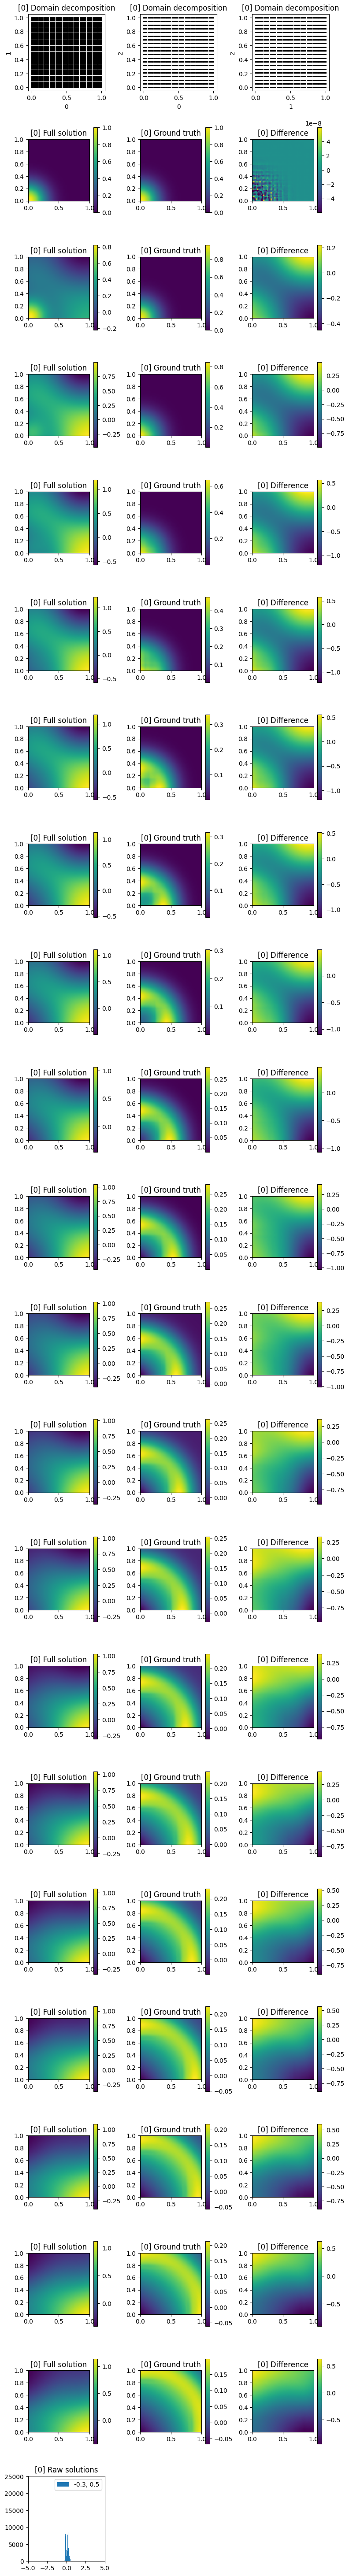

[INFO] 2025-05-31 19:16:05 - [i: 1000/25000] loss: 0.5007 rate: 10.5 elapsed: 0.03 hr test
[INFO] 2025-05-31 19:17:34 - [i: 2000/25000] loss: 0.2094 rate: 11.3 elapsed: 0.05 hr test
[INFO] 2025-05-31 19:19:03 - [i: 3000/25000] loss: 0.1335 rate: 11.2 elapsed: 0.08 hr test
[INFO] 2025-05-31 19:20:32 - [i: 4000/25000] loss: 0.0996 rate: 11.3 elapsed: 0.10 hr test
[INFO] 2025-05-31 19:22:01 - [i: 5000/25000] loss: 0.0769 rate: 11.2 elapsed: 0.13 hr test
[INFO] 2025-05-31 19:22:04 - saved arrays


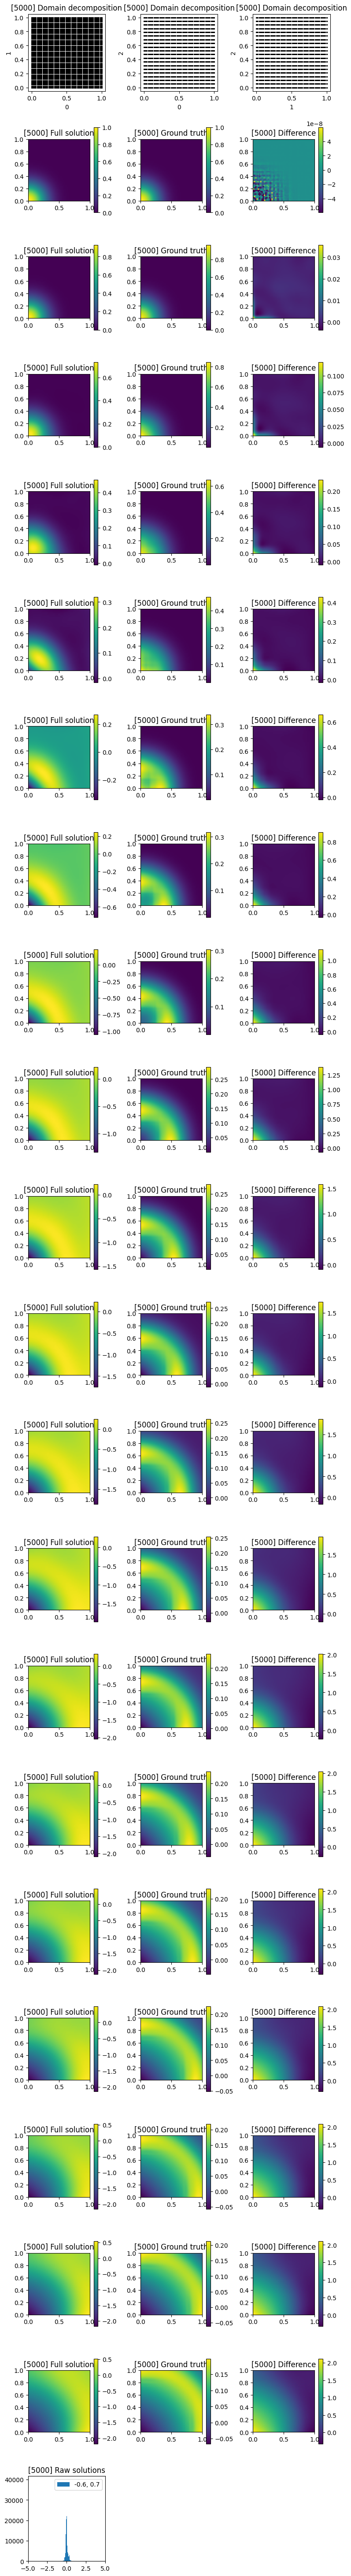

[INFO] 2025-05-31 19:23:41 - [i: 6000/25000] loss: 0.5790 rate: 11.2 elapsed: 0.16 hr test
[INFO] 2025-05-31 19:25:10 - [i: 7000/25000] loss: 0.1663 rate: 11.2 elapsed: 0.18 hr test
[INFO] 2025-05-31 19:26:39 - [i: 8000/25000] loss: 0.1460 rate: 11.2 elapsed: 0.21 hr test
[INFO] 2025-05-31 19:28:08 - [i: 9000/25000] loss: 0.0754 rate: 11.2 elapsed: 0.23 hr test
[INFO] 2025-05-31 19:29:37 - [i: 10000/25000] loss: 0.1425 rate: 11.2 elapsed: 0.26 hr test
[INFO] 2025-05-31 19:29:40 - saved arrays


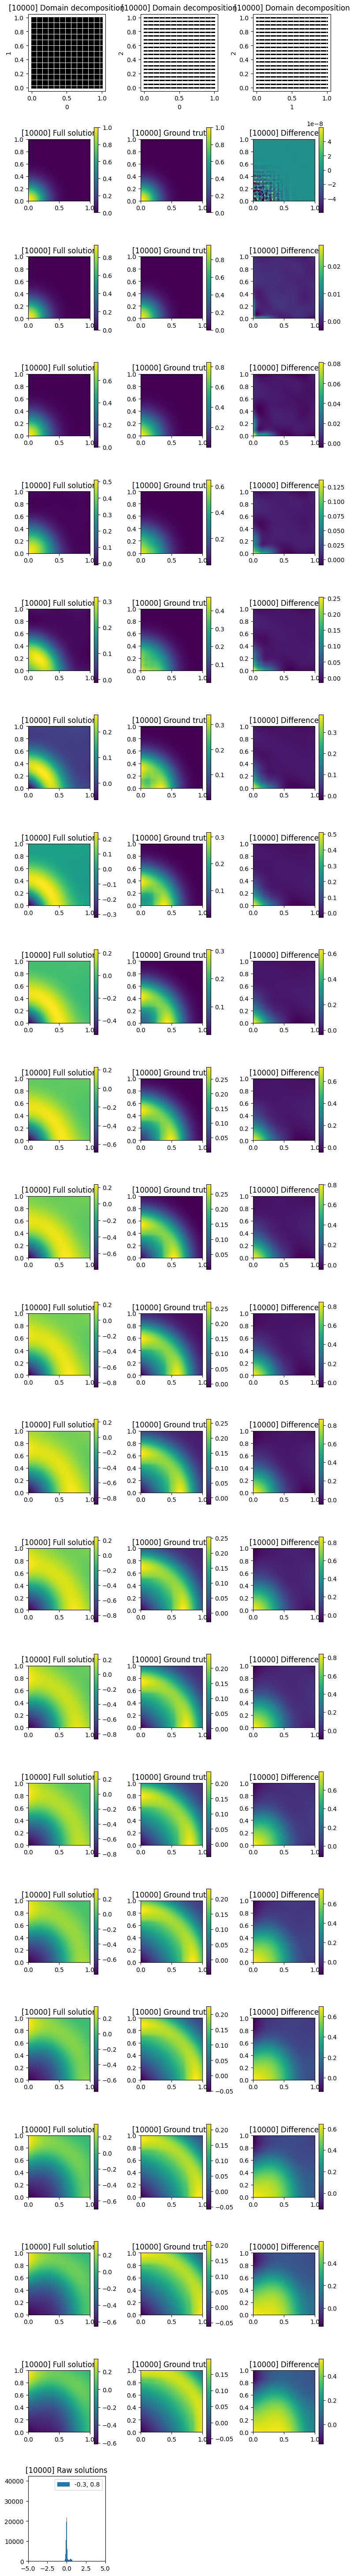

[INFO] 2025-05-31 19:31:17 - [i: 11000/25000] loss: 0.0510 rate: 11.2 elapsed: 0.28 hr test


KeyboardInterrupt: 

In [6]:
import jax.numpy as jnp
import jax
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import FCN, ChebyshevKAN, ChebyshevAdaptiveKAN, OptimizedStackedChebyshevKAN
from fbpinns.schedulers import LineSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer
from fbpinns.attention import RBAttention
from fbpinns.problems import WaveEquationConstantVelocity3D

subdomain_xs=[np.linspace(0,1,2), np.linspace(0,1,2), np.linspace(0,1,2)]
c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0., 0., 0.]),
        xmax=np.array([1., 1., 1.]),
        ),
    problem=WaveEquationConstantVelocity3D,
    problem_init_kwargs = dict(
    ),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 2.9),
        unnorm=(0.,5.),
    ),
    # network=FCN,
    # network_init_kwargs = dict(
    #     layer_sizes = (3, 16, 1),
    # ),
    network=OptimizedStackedChebyshevKAN,
    network_init_kwargs=dict(
        dims=[3, 4, 1],
        degrees=[4, 4]
    ),
    optimiser_kwargs = dict(
        learning_rate=0.01
        ),
    ns=((50,50,20),),
    n_test=(50,50,20),
    n_steps=25000,
    clear_output=False,
    attention_tracker=RBAttention,
    attention_tracking_kwargs=dict(
        eta_lr = 1e-2,
        gamma_decay = 0.99,
        out_dim=1,
        N=50000
        ),
    )

run = FBPINNTrainer(c)
all_params = run.train()